# Entrega 3

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data = pd.read_csv('iris.data',names=['sepal_length','sepal_width','petal_length','petal_width','class'])

In [7]:
# Seleccion de las dos features
x1 = data['sepal_length']
x2 = data['petal_length']

cl = data['class']


In [55]:
class_0 = cl == 'Iris-setosa'
class_1 = cl != 'Iris-setosa'
# class_1 = cl == 'Iris-versicolor'
# class_2 = cl == 'Iris-virginica'

    

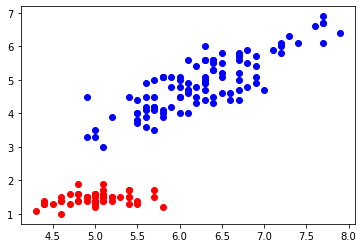

In [57]:
plt.plot(x1[class_0],x2[class_0],'o',c='red',label='Iris-setosa')
plt.plot(x1[class_1],x2[class_1],'o',c='blue',label='Otras')

In [60]:
#-- Esta es la función que queremos encontrar
def y(x):
    return -(b + w_1*x)/w_2
#-- Definimos nuestra función de activación, en este caso usamos un Sigmoide
def act(z):
    return 1/(1 + np.exp(-z))

In [62]:
# Inicializamos los pesos en 0
b = 0
w_1 = 0
w_2 = 0

# Inicializamos el número de épocas y la rata de aprendizaje
n_epochs = 15 # Número de épocas
n = 0.5      # Tasa de aprendizaje

# Entrenamos el Perceptron
for epoch in range(n_epochs):
    for i,j,k in zip(x1,x2,cl):
    
        # Función de Suma
        z = i*w_1 + j*w_2 + b

        # Función de Activación
        sig_z = act(z)

        # Evaluamos la salida (output)
        if sig_z >= 0.5:
            out = 1
        if sig_z < 0.5:
            out = 0

        # Calculamos el error
        error = k - out

        # Actualizamos los pesos
        b = b + n*error
        w_1 += n*error*i
        w_2 += n*error*j

        print('Epoch [{}/{}], bias: {}, w1: {}, w2: {}'.format(epoch+1,n_epochs,b,w_1,w_2))

        fig = plt.figure(figsize=(4,4))
        plt.plot(x1[class_0],x2[class_0],'o', c='black', label='0')
        plt.plot(x1[class_1],x2[class_1],'o', c='red', label='1')
        plt.plot(np.sort(x1),y(np.sort(x1)),'-', c='green',)
        plt.xlim(0,1)
        plt.ylim(0,1)
        plt.legend()
        plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'int'

In [63]:
class_0

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
       ...  
120    False
121    False
122    False
123    False
124    False
125    False
126    False
127    False
128    False
129    False
130    False
131    False
132    False
133    False
134    False
135    False
136    False
137    False
138    False
139    False
140    False
141    False
142    False
143    False
144    False
145    False
146    False
147    False
148    False
149    False
Name: class, Length: 150, dtype: bool